## Assignment 1

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline

In [30]:
# We would skip one row as it contains headings 
# which are not useful for us.
df = np.loadtxt('data.txt', skiprows=1)

In [31]:
df.shape

(999, 11)

### Let's plot the distribution between 1st and 2nd feature ###

We will be using red colour for label 1 and blue colour for label 2.

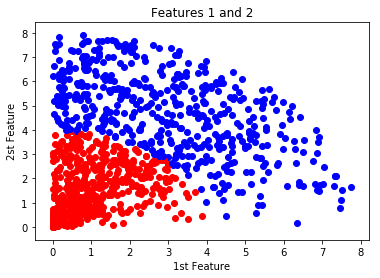

In [48]:
for i in range(0,999):
    if(df[i, 0] == 1):
        plt.scatter(df[i, 1], df[i, 2], c='r')
    else:
        plt.scatter(df[i, 1], df[i, 2], c='b')
plt.title('Features 1 and 2')
plt.xlabel('1st Feature')
plt.ylabel('2st Feature')
plt.show()

### Ploting the distribution between 2nd and 3rd feature

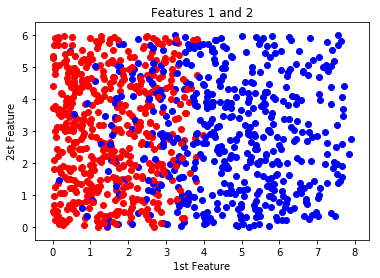

In [49]:
for i in range(0,999):
    if(df[i, 0] == 1):
        plt.scatter(df[i, 2], df[i, 3], c='r')
    else:
        plt.scatter(df[i, 2], df[i, 3], c='b')
plt.title('Features 1 and 2')
plt.xlabel('2st Feature')
plt.ylabel('3st Feature')
plt.show()

Since, there are total 45 combinations available, and considering the fact are we are lazy programmers, we will use loops to make our work simple

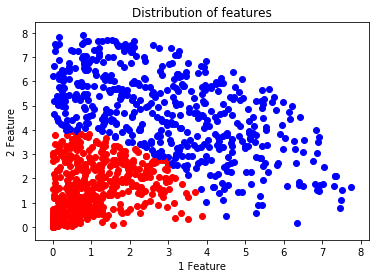

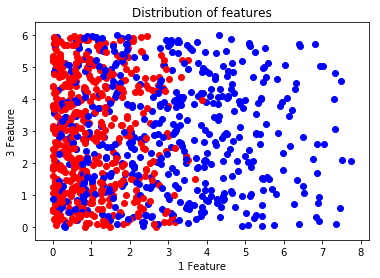

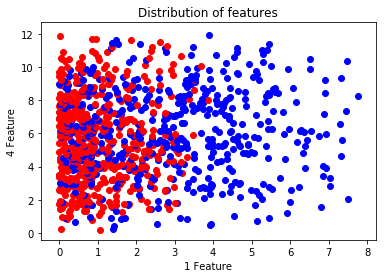

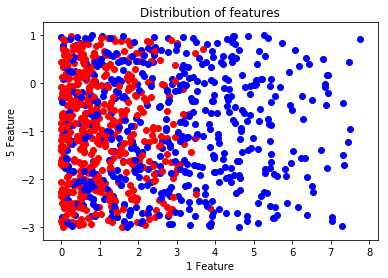

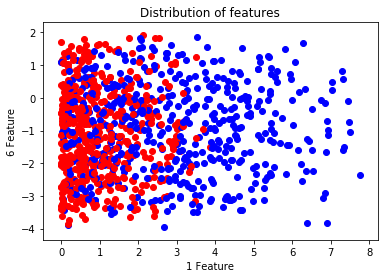

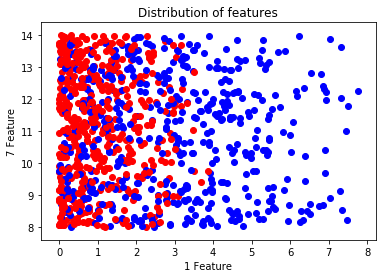

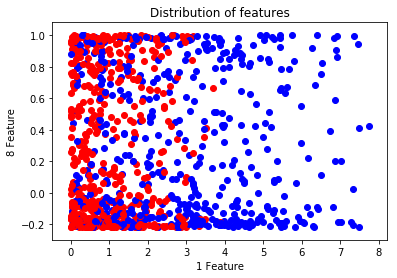

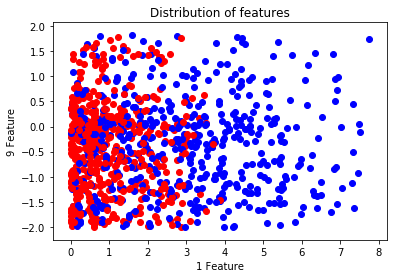

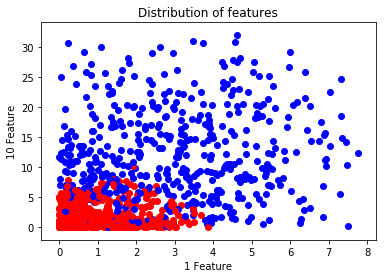

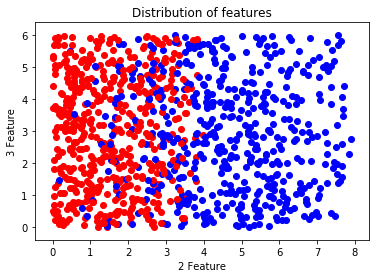

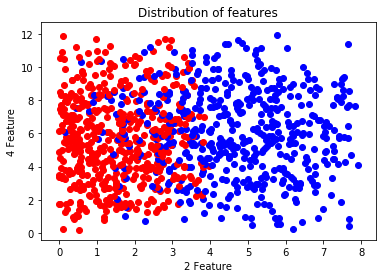

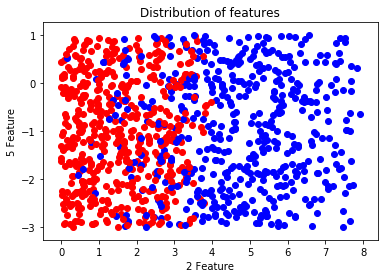

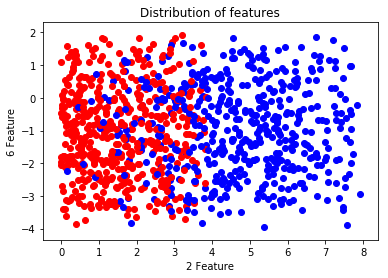

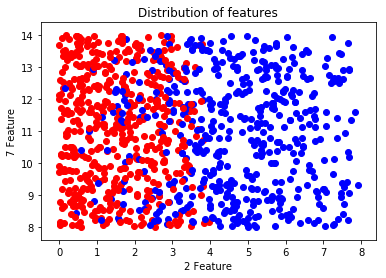

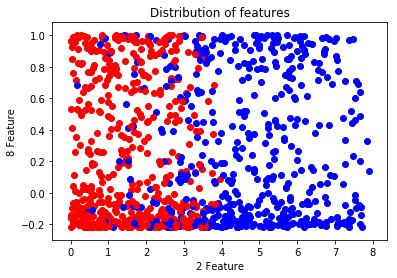

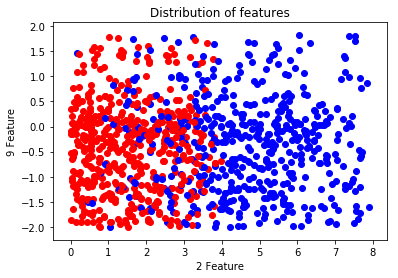

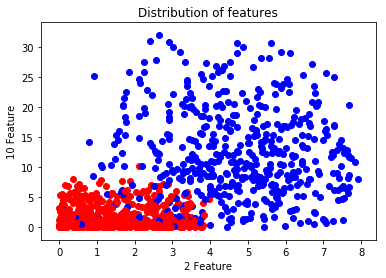

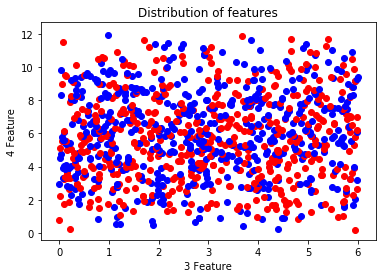

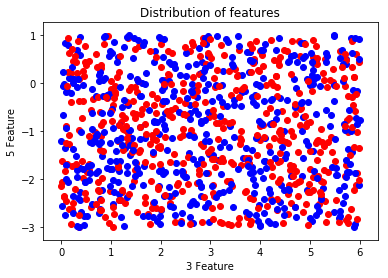

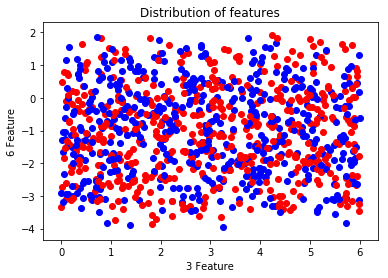

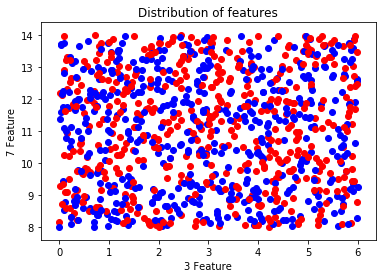

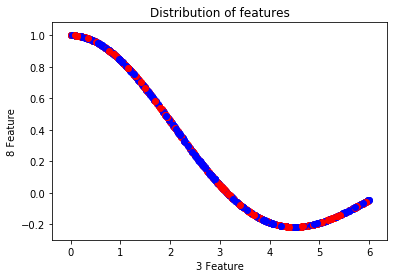

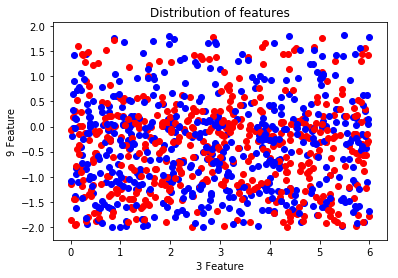

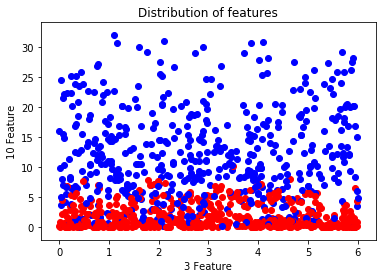

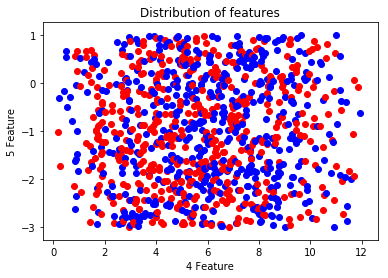

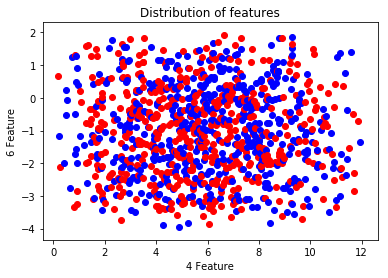

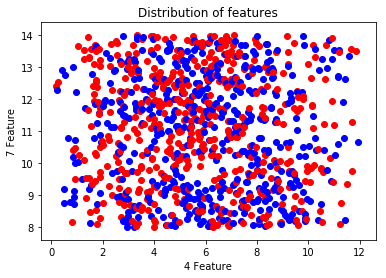

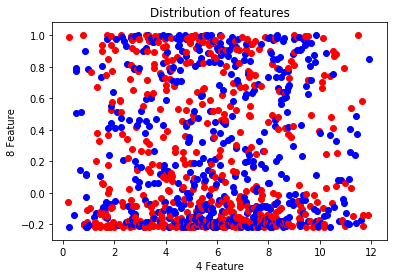

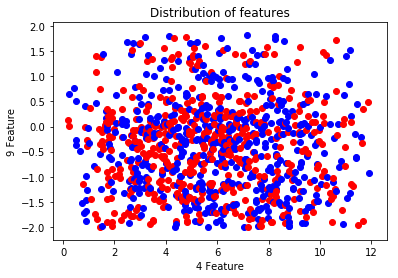

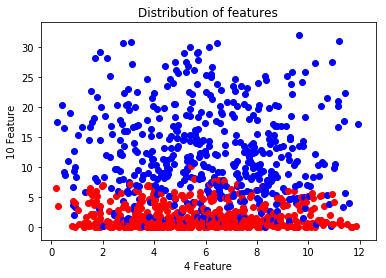

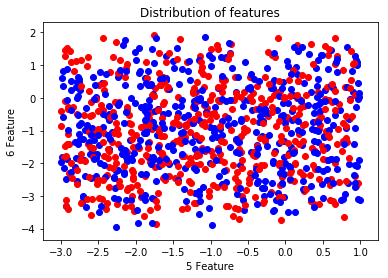

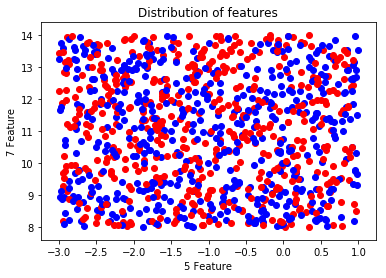

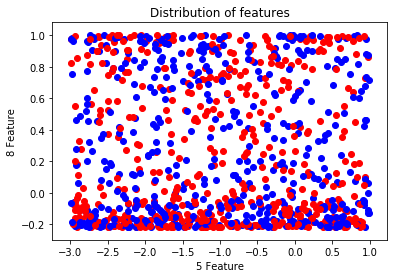

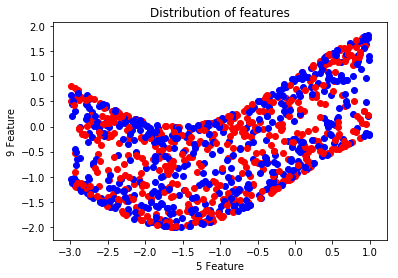

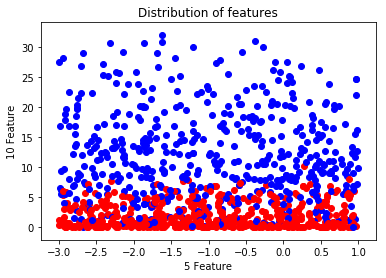

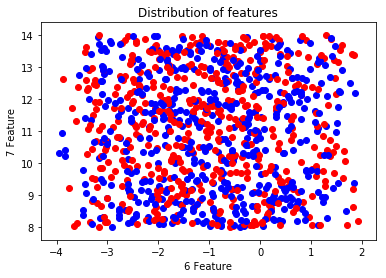

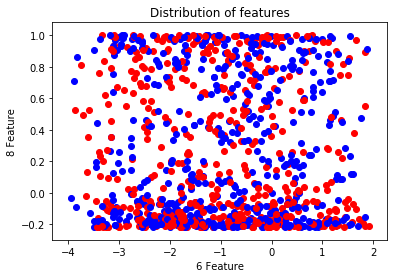

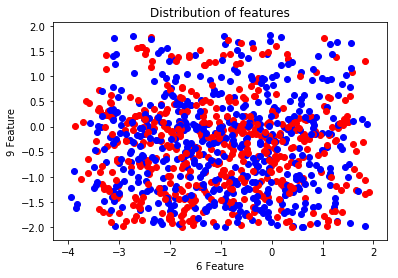

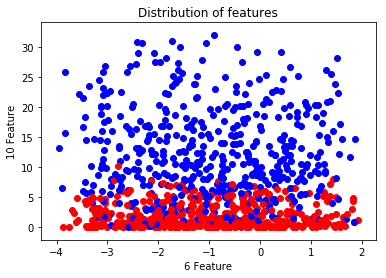

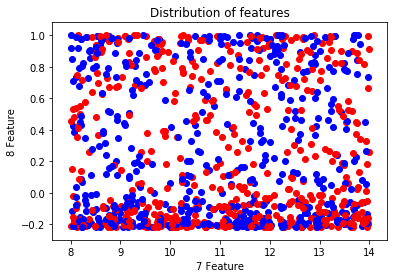

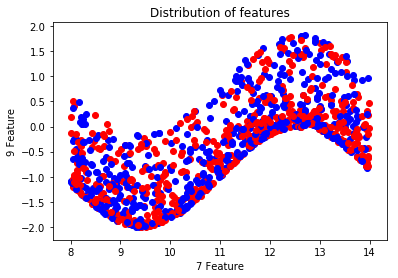

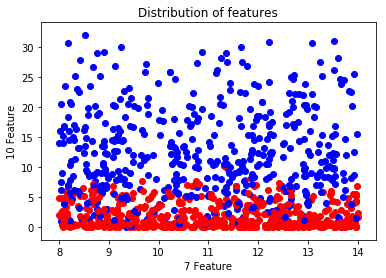

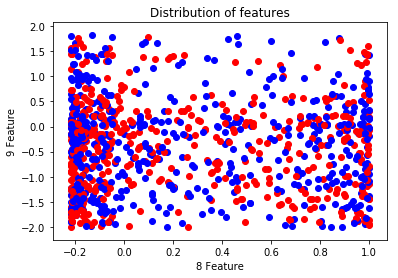

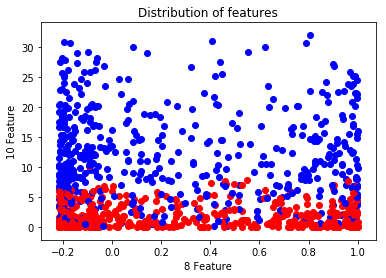

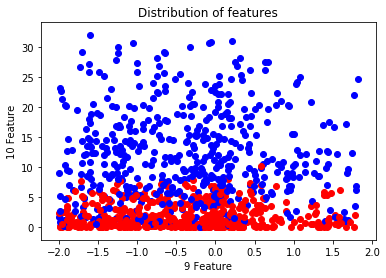

In [51]:
for i in range(1, 11):
    for j in range(1, 11):
        if(i<j):
            for k in range(1, 999):
                if(df[k, 0] == 1):
                    plt.scatter(df[k, i], df[k, j], c='r')
                else:
                    plt.scatter(df[k, i], df[k, j], c='b')
            plt.title('Distribution of features')
            plt.xlabel('%d Feature'%i)
            plt.ylabel('%d Feature'%j)
            plt.show()

### After looking all the distributions, we can clearly say that Feature 1 and Feature 2 are the two best features.

## Bonus Task
We will now apply PCA to see the features we observed are the ones which describe the data well or not.

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [163]:
label = df[:,0]
features = df[:, 1:]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [172]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pcom = pca.fit_transform(features)
print(features.shape)
print(pca_data.shape)
print(pca.explained_variance_ratio_)

(999, 10)
(999, 2)
[0.71363823 0.08506042]


We can see that the two components describe around 80% of the data.

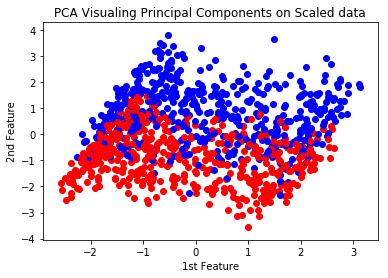

In [173]:
for i in range(0,999):
    if(label[i] == 1):
        plt.scatter(pca_data[i, 0], pca_data[i, 1], c='r')
    else:
        plt.scatter(pca_data[i, 0], pca_data[i, 1], c='b')
plt.title('PCA Visualing Principal Components on Scaled data')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.show()

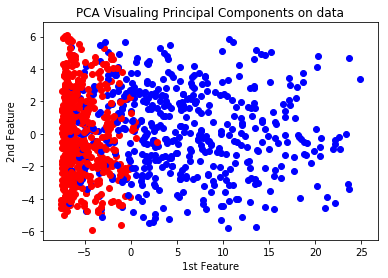

In [174]:
for i in range(0,999):
    if(label[i] == 1):
        plt.scatter(pcom[i, 0], pcom[i, 1], c='r')
    else:
        plt.scatter(pcom[i, 0], pcom[i, 1], c='b')
plt.title('PCA Visualing Principal Components on data')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.show()

We will also try to verify our results using different PCA algorithms.

In [175]:
from sklearn.decomposition import RandomizedPCA

In [176]:
rpca = RandomizedPCA(n_components=2)
rpca_data = rpca.fit_transform(features)
rpca_data.shape

/home/salil/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(999, 2)

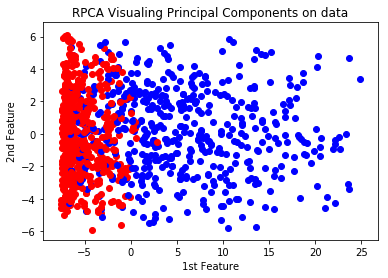

In [177]:
for i in range(0,999):
    if(label[i] == 1):
        plt.scatter(rpca_data[i, 0], rpca_data[i, 1], c='r')
    else:
        plt.scatter(rpca_data[i, 0], rpca_data[i, 1], c='b')
plt.title('RPCA Visualing Principal Components on data')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.show()

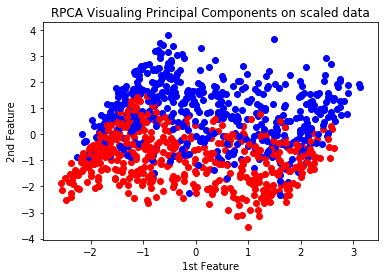

In [178]:
rpca_scaled_data = rpca.fit_transform(scaled_data)
for i in range(0,999):
    if(label[i] == 1):
        plt.scatter(rpca_scaled_data [i, 0], rpca_scaled_data [i, 1], c='r')
    else:
        plt.scatter(rpca_scaled_data [i, 0], rpca_scaled_data [i, 1], c='b')
plt.title('RPCA Visualing Principal Components on scaled data')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The PCA class was deprecated in version 2.2.
  


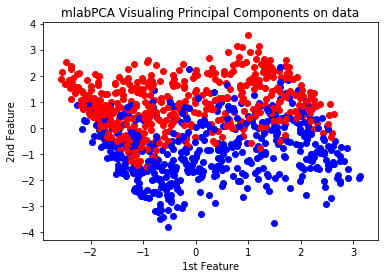

In [179]:
from matplotlib.mlab import PCA as mlabPCA
mlab_pca = mlabPCA(features)
for i in range(0,999):
    if(label[i] == 1):
        plt.scatter(mlab_pca.Y[i, 0], mlab_pca.Y[i, 1], c='r')
    else:
        plt.scatter(mlab_pca.Y[i, 0], mlab_pca.Y[i, 1], c='b')
plt.title('mlabPCA Visualing Principal Components on data')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The PCA class was deprecated in version 2.2.
  """Entry point for launching an IPython kernel.


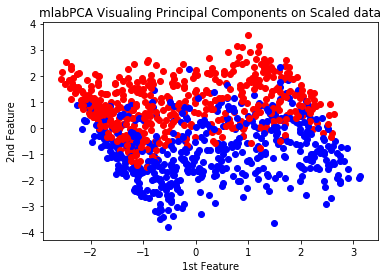

In [180]:
mlab_scaled = mlabPCA(scaled_data)
for i in range(0,999):
    if(label[i] == 1):
        plt.scatter(mlab_scaled.Y[i, 0], mlab_scaled.Y[i, 1], c='r')
    else:
        plt.scatter(mlab_scaled.Y[i, 0], mlab_scaled.Y[i, 1], c='b')
plt.title('mlabPCA Visualing Principal Components on Scaled data')
plt.xlabel('1st Feature')
plt.ylabel('2nd Feature')
plt.show()